# Preprocessing

In [23]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data_dir1 = "/home/w8lin/Data/jester-data-1.xls"
data_dir2 = "/home/w8lin/Data/jester-data-2.xls"
data_dir3 = "/home/w8lin/Data/jester-data-3.xls"

df1 = pd.read_excel(data_dir1, header=None)
df2 = pd.read_excel(data_dir2, header=None)
df3 = pd.read_excel(data_dir3, header=None)
df = df1.append(df2).append(df3)

# df = pd.DataFrame(pd.read_excel(data_dir))

In [25]:
df.index = range(df.shape[0])
df.index.name = "userID"

col_names = ["joke"+str(i) for i in range(1, df.shape[1])]
df.columns = ["NumRated"] + col_names
df[df == 99.00] = np.nan
df.head(6)


,NumRated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
userID,,,,,,,,,,,,,,,,,,,,,
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100.0,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [30]:
df = df.loc[:, df.columns != "NumRated"]
df.head(6)

,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
userID,,,,,,,,,,,,,,,,,,,,,
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [27]:
# global average
global_avg = np.nanmean(df)

# user's average rating
user_avgs = np.nanmean(df, axis=1)

# joke's average rating
joke_avgs = np.nanmean(df, axis=0)

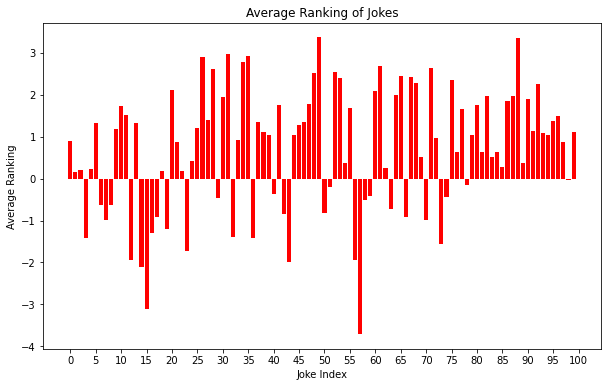

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(x=np.arange(0, 100), height=joke_avgs, color='red')
ax.set_title("Average Ranking of Jokes")
ax.set_xlabel("Joke Index")
ax.set_ylabel("Average Ranking")
ax.set_xticks(np.arange(0, 105, 5));

Text(0, 0.5, 'Frequency')

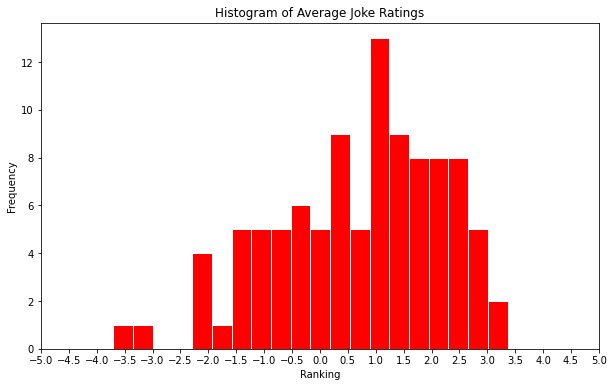

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(joke_avgs, bins=20, edgecolor="white", color='red')
ax.set_xticks(np.arange(-5, 5.5, 0.5))
ax.set_title("Histogram of Average Joke Ratings")
ax.set_xlabel("Ranking")
ax.set_ylabel("Frequency")

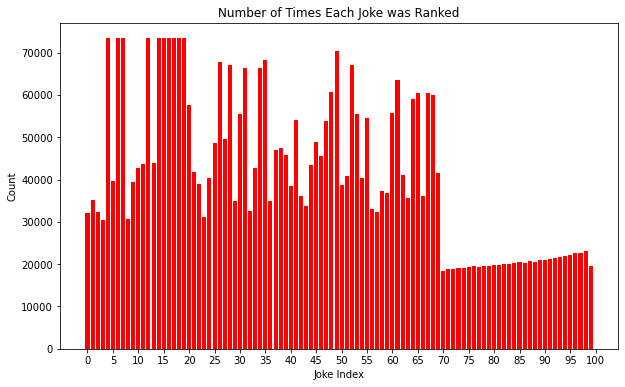

In [38]:
# how many times each joke was rated
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

joke_counts = df.count()
ax.bar(x=range(0, 100), height=joke_counts, color='red')
ax.set_title("Number of Times Each Joke was Ranked")
ax.set_xlabel("Joke Index")
ax.set_ylabel("Count")
ax.set_xticks(np.arange(0, 105, 5));

Jokes(5, 7, 8, 13, 15, 16, 17, 18, 19, 20) have been ranked the most

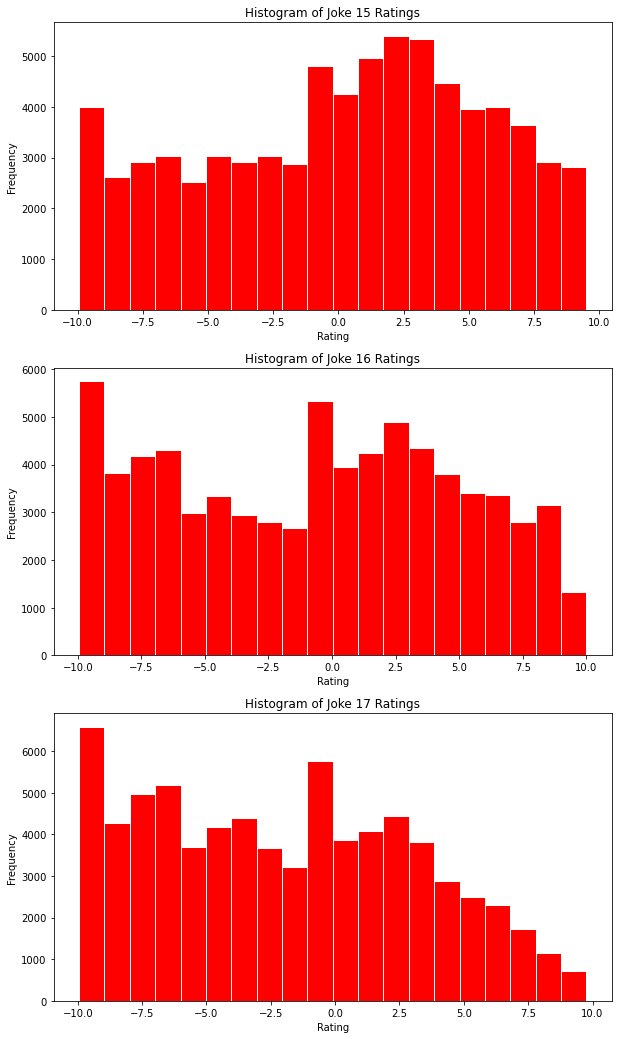

In [39]:
fig,ax = plt.subplots(3, 1, figsize=(10, 18))

joke15_ratings = df["joke15"].to_numpy()
joke15_ratings = joke15_ratings[~np.isnan(joke15_ratings)]

joke16_ratings = df["joke16"].to_numpy()
joke16_ratings = joke16_ratings[~np.isnan(joke16_ratings)]

joke17_ratings = df["joke17"].to_numpy()
joke17_ratings = joke17_ratings[~np.isnan(joke17_ratings)]

ax[0].hist(joke5_ratings, bins=20, edgecolor="white", color='red')
ax[0].set_title("Histogram of Joke 15 Ratings")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Rating")

ax[1].hist(joke7_ratings, bins=20, edgecolor="white", color='red')
ax[1].set_title("Histogram of Joke 16 Ratings")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Rating")

ax[2].hist(joke13_ratings, bins=20, edgecolor="white", color='red')
ax[2].set_title("Histogram of Joke 17 Ratings")
ax[2].set_ylabel("Frequency")
ax[2].set_xlabel("Rating");

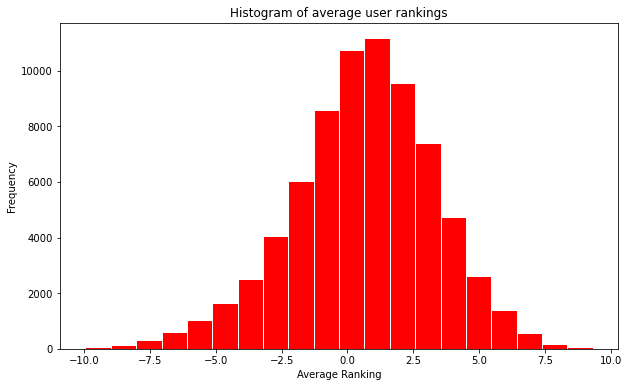

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(user_avgs[1:], bins=20, edgecolor="white", color='red')
ax.set_title("Histogram of average user rankings")
ax.set_xlabel("Average Ranking")
ax.set_ylabel("Frequency");

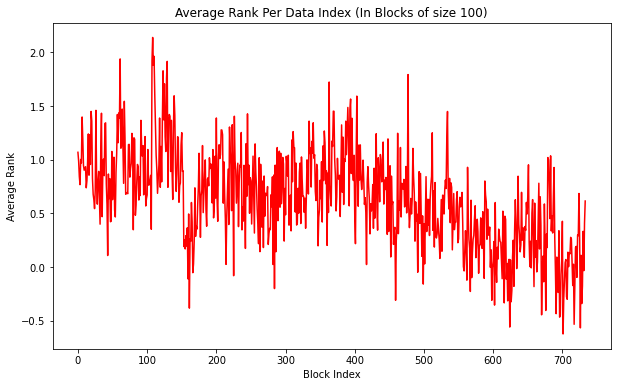

In [34]:
size_groups = 100
num_groups = int(df.shape[0] / size_groups)
avg_rating = np.zeros(num_groups)

for i in range(num_groups):
    group = df.iloc[i*size_groups: (i+1)*size_groups]
    avg_rating[i] = np.nanmean(group)
    
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(np.arange(num_groups), avg_rating, color='red')
ax.set_title("Average Rank Per Data Index (In Blocks of size {})".format(size_groups))
ax.set_xlabel("Block Index")
ax.set_ylabel("Average Rank");